# Testing a CNN with the dataset

This code is used to test a CNN and some image preprocessing utilities with Keras

In [1]:
import numpy as np
import tensorflow as tf
from tensorflow import keras
import glob
import PIL
import PIL.Image
import glob
import pathlib
import matplotlib.pyplot as plt

from tensorflow.keras import layers
import tensorflow_addons as tfa

c:\Users\Kostas\anaconda3\envs\vit\lib\site-packages\scipy\__init__.py:146: UserWarning: A NumPy version >=1.16.5 and <1.23.0 is required for this version of SciPy (detected version 1.23.4
  warnings.warn(f"A NumPy version >={np_minversion} and <{np_maxversion}"


In [20]:
dataset_dir = pathlib.Path(r"C:\Users\Kostas\Desktop\GIMA\Module_7\Data\filtered_patches_GEE")

## Imports and display

In [21]:
def load_tiff_image(image_path):
    with rasterio.open(image_path) as src:
        return src.read()

In [ ]:
import os

base_dir = dataset_dir
class_dirs = [d for d in os.listdir(base_dir) if os.path.isdir(os.path.join(base_dir, d))]

images = []
labels = []
for class_id in class_dirs:
    image_files = [f for f in os.listdir(os.path.join(base_dir, class_id)) if f.endswith('.tif')]
    for f in image_files:
        images.append(load_tiff_image(os.path.join(base_dir, class_id, f)))
        labels.append(int(class_id))

In [ ]:
images = [(image - np.min(image)) / (np.max(image) - np.min(image)) for image in images]

In [ ]:
image_dataset = tf.data.Dataset.from_tensor_slices(images) 
label_dataset = tf.data.Dataset.from_tensor_slices(labels) 
dataset = tf.data.Dataset.zip((image_dataset, label_dataset)) # Zipped together

In [19]:
test_image = r"C:\Users\Kostas\Desktop\GIMA\Module_7\Data\filtered_patches_GEE\11\sentinel2_images_mean_2019-04-01_to_2019-05-01-0000000000-0000000000index_49410_station_110_label_DBL_phase_id_11.tif"

In [ ]:
load_tiff_image(test_image)

In [6]:
# Importing the dataset

print('Training Data')

train_dataset = tf.keras.preprocessing.image_dataset_from_directory(
    directory=dataset_dir,
    labels="inferred",
    label_mode="int",
    class_names=None,
    color_mode="rgb",
    batch_size=32,
    image_size=(256, 256),
    shuffle=True,
    seed=100,
    validation_split=0.3,
    subset='training',
    interpolation="bilinear",
    follow_links=False,
    crop_to_aspect_ratio=False,
)

print('\nValidation Data')

validation_dataset = tf.keras.preprocessing.image_dataset_from_directory(
    directory=dataset_dir,
    labels="inferred",
    label_mode="int",
    class_names=None,
    color_mode="rgb",
    batch_size=32,
    image_size=(256, 256),
    shuffle=True,
    seed=100,
    validation_split=0.3,
    subset='validation',
    interpolation="bilinear",
    follow_links=False,
    crop_to_aspect_ratio=False,
)

Training Data
Found 1943 files belonging to 2 classes.
Using 1361 files for training.

Validation Data
Found 1943 files belonging to 2 classes.
Using 582 files for validation.


In [8]:
print(type(train_dataset))
class_names = train_dataset.class_names # return type: list
print(class_names)
type(class_names)

<class 'tensorflow.python.data.ops.dataset_ops.BatchDataset'>
['11', '60']


list

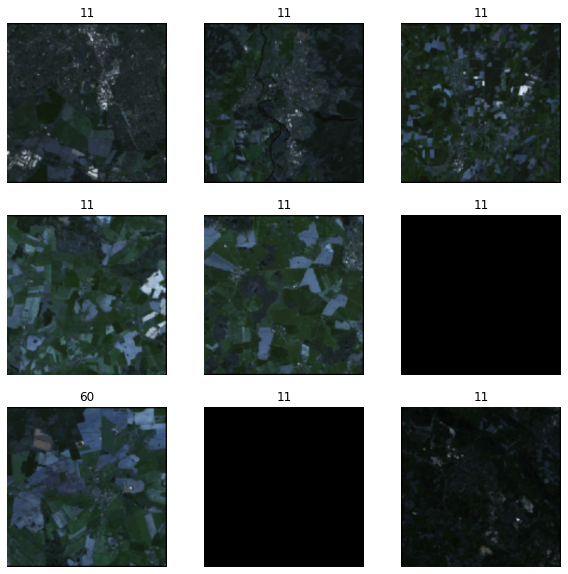

In [10]:
# Show some images
plt.figure(figsize=(10, 10))
for images, labels in train_dataset.take(1):
    for i in range(9):
        ax = plt.subplot(3, 3, i +1)
        plt.imshow(images[i].numpy().astype("uint8"))
        plt.title(class_names[labels[i]])
        [plt.axis("off")]

## Building and training the network

In [13]:
num_classes = len(class_names)

model = tf.keras.Sequential([
  tf.keras.layers.Rescaling(1./255),
  tf.keras.layers.Conv2D(32, 3, activation='relu'),
  tf.keras.layers.MaxPooling2D(),
  tf.keras.layers.Conv2D(32, 3, activation='relu'),
  tf.keras.layers.MaxPooling2D(),
  tf.keras.layers.Conv2D(32, 3, activation='relu'),
  tf.keras.layers.MaxPooling2D(),
  tf.keras.layers.Flatten(),
  tf.keras.layers.Dense(128, activation='relu'),
  tf.keras.layers.Dense(num_classes)
])

In [14]:
model.compile(
    optimizer='adam',
    loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
    metrics=['accuracy'])

In [16]:
model.fit(
  train_dataset,
  validation_data=validation_dataset,
  epochs=10
)

Epoch 1/10
43/43 [==============================] - 44s 1s/step - loss: 0.4485 - accuracy: 0.8538 - val_loss: 0.3612 - val_accuracy: 0.8540
Epoch 2/10
43/43 [==============================] - 44s 1s/step - loss: 0.3217 - accuracy: 0.8913 - val_loss: 0.2372 - val_accuracy: 0.9244
Epoch 3/10
43/43 [==============================] - 45s 1s/step - loss: 0.1374 - accuracy: 0.9544 - val_loss: 0.1538 - val_accuracy: 0.9639
Epoch 4/10
43/43 [==============================] - 44s 1s/step - loss: 0.0904 - accuracy: 0.9684 - val_loss: 0.1424 - val_accuracy: 0.9605
Epoch 5/10
43/43 [==============================] - 44s 1s/step - loss: 0.0755 - accuracy: 0.9728 - val_loss: 0.1604 - val_accuracy: 0.9674
Epoch 6/10
43/43 [==============================] - 44s 1s/step - loss: 0.0768 - accuracy: 0.9706 - val_loss: 0.1415 - val_accuracy: 0.9674
Epoch 7/10
43/43 [==============================] - 45s 1s/step - loss: 0.0733 - accuracy: 0.9728 - val_loss: 0.1489 - val_accuracy: 0.9674
Epoch 8/10
43/43 [==